<a href="https://colab.research.google.com/github/mis2n/ColabImages/blob/main/CapstoneHMWK6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




From: [https://en.wikipedia.org/wiki/Three-body_problem](https://en.wikipedia.org/wiki/Three-body_problem)



*In 1893, Meissel stated what is now called the Pythagorean three-body problem: three masses in the ratio 3:4:5 are placed at rest at the vertices of a 3:4:5 right triangle. Burrau[8] further investigated this problem in 1913. In 1967 Victor Szebehely and C. Frederick Peters established eventual escape for this problem using numerical integration, while at the same time finding a nearby periodic solution.[9]*


Another reference to this is:
[http://www.ucolick.org/~laugh/oxide/projects/burrau.html](http://www.ucolick.org/~laugh/oxide/projects/burrau.html)

For this problem, the initial conditons for this are:

G = 1

For mass 1:
$$x = 0 \\
y = 0 \\
M = 5 
$$

For mass 2:
$$x = 4 \\
y = 0 \\
M = 3
$$

For mass 3:
$$x = 0 \\
y = 3 \\
M = 4
$$

The initial velocities are all zero.

This is a video of this problem:
[https://www.youtube.com/watch?v=Y2pi5Ra-ZFQ&feature=youtu.be](https://www.youtube.com/watch?v=Y2pi5Ra-ZFQ&feature=youtu.be)



The equations governing this system are:


$$
\frac{d^2x_i}{dt^2} = -\frac{1}{M_i}\left[ \frac{G M_j (x_i-x_j)}{((x_i - x_j)^2 + (y_i - y_j)^2)^{3/2}}
-\frac{G M_k (x_i - x_k)}{((x_i - x_k)^2 + (y_i - y_k)^2)^{3/2}} \right]
$$


$$
\frac{d^2y_i}{dt^2} = -\frac{1}{M_i} \left[ \frac{G M_j (y_i-y_j)}{((y_i - y_j)^2 + (y_i - y_k)^2)^{3/2}}
+ \frac{G M_k (y_i - y_k)}{((x_i - x_k)^2 + (y_i - y_k)^2)^{3/2}} \right]
$$ 


### Homework 6 - Due Monday February 22


*The underlying problem in Computational Science is being able to understand the uncertainty of your results.  This problem is difficult problem where numerical solutions can diverge rapidly from the actual solution.*

#### The problem
Find a numerical solution to the Pythagorian 3-body problem.  Record the final locations and velocities at:

T = 250, 500, 750, 1000  (Optionally at 1500, 2000)

**For the analysis:**
- You must use QUAD precision for this problem.
- Use the existing SCIPY routine for the integration.   
- Repeat the calculation using the RK4 routine 
  - How does the step size affect the result
  - Implement a RK45 routine - determine how setting a stepwise tolerance affects the final results.

  - Implement a higher order or high accuracy ODE routine.   This could be a:
    - [A 12th/10th order RK Nystrom routine](https://www.mathworks.com/matlabcentral/fileexchange/25291-rkn1210-a-12th-10th-order-runge-kutta-nystrom-integrator)
    - [Richardson Extrapolation and Bulirsch-Stoer](http://www.physics.unlv.edu/~jeffery/astro/computer/numrec/f16-4.pdf)
    - A similar higher order ODE


**For this problem, you will work in a group of 3.**
- You will turn in one report and one code (or group codes).  
- You can use external code for the solvers, **BUT YOU MUST DOCUMENT WHEN YOU HAVE USED THIS CODE.**
-  You must cite any references.
- Your group should document the SPECIFIC tasks you did, including commments in the code for the sections you wrote.

You may wish to use something besides Python to improve efficiency.

The writeup should include:
- Analysis of the error at the snapshots times
  - How do different methods affect the result?
  - Can you keep improving the accuracy by decreasing h without going to higher order?
  - How does your higher order method work in comparision to the lower order method?
    - How is the accuracy different between the methods?  
    - How does the implemention differ in complexity?
    - Which is the best option to use for a difficult problem like this.
  - Did you get the correct answer after your efforts?
 

Create a movie to animate the motion and publish it on youtube.  Because it will be cool!




In [18]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

In [23]:
# a basic rk4 routine implemented in python
#  based on an rk4 routine from:
# https://math.okstate.edu/people/yqwang/teaching/math4513_fall11/Notes/rungekutta.pdf

# the code has been modified to use arbitrary function names, return
# output in an array, and have vectors of an arbitrary length for
# its input



def myrungekutta(fnct, h, t, nsteps, y0):
# rk4 routine  
# inputs:
#.  fnct.  - a reference to a function to integrate
#   h      - stepsize (dt)
#   t      - starting time for the integration
#   nsteps - number of steps to take during the integration
#   y0     - initial conditions for the equation
#
#  outputs:
#  output:  an array of the output values of system
  y = y0
  # find the number of values in the initial conditions array
  ny = len(y)
  output = np.zeros([nsteps,ny+1], np.float)

  # loop over the array and calculate the position using an rk4
  # ODE integration routine
  for i in range(nsteps):
    k1 = h*fnct(t,y)
    k2 = h*fnct(t+h/2, y+k1/2)
    k3 = h*fnct(t+h/2, y+k2/2)
    k4 = h*fnct(t+h, y+k3)
    y = y + (k1 + 2*(k2+k3) + k4)/6
    t = t + h
    output[i,0] = t
    output[i,1:] = y[:]
    if i < 25:
      print(output[i])

  return output

##################
def fnc(t,y):
  xpos = y[0]
  ypos = y[1]
  xvel = y[2]
  yvel = y[3]
  r = np.sqrt(xpos*xpos + ypos*ypos)
  k = 1
  a = -k / r**2
  ax = (a * xpos) / r
  ay = (a * ypos) / r
  return np.array([xvel, yvel, ax, ay])

y = np.array([1,0,0,1/np.sqrt(2)])
t0 = 0.0
h = 0.000005
tfinal = 5.0
num_iter = math.ceil((tfinal - t0) / h)
xf = []
yf = []
xb = []
yb = []


In [24]:
# Initial positions for  the Pythagorian 3-body problem
m3 = [4, 0, 0, 0]
m4 = [0, 3, 0, 0]
m5 = [0, 0, 0, 0]

'''
Process steps
_____________________________

set initial condition for all 3 bodies
for each time step
  for each body
    for each other body
      calculate the distance between prime body and other bodies
      calculate the change in x/y velocities of prime body due to other bodies
    sum the changes caused by other bodies
  update location and velocity of prime body
  
'''

o = myrungekutta(fnc, h, t, num_iter, y)

[ 5.00000000e-06  1.00000000e+00  3.53553391e-06 -5.00000000e-06
  7.07106781e-01]
[ 1.00000000e-05  1.00000000e+00  7.07106781e-06 -1.00000000e-05
  7.07106781e-01]
[ 1.50000000e-05  1.00000000e+00  1.06066017e-05 -1.50000000e-05
  7.07106781e-01]
[ 2.00000000e-05  1.00000000e+00  1.41421356e-05 -2.00000000e-05
  7.07106781e-01]
[ 2.50000000e-05  1.00000000e+00  1.76776695e-05 -2.50000000e-05
  7.07106781e-01]
[ 3.00000000e-05  1.00000000e+00  2.12132034e-05 -3.00000000e-05
  7.07106781e-01]
[ 3.50000000e-05  9.99999999e-01  2.47487373e-05 -3.50000000e-05
  7.07106781e-01]
[ 4.00000000e-05  9.99999999e-01  2.82842712e-05 -4.00000000e-05
  7.07106781e-01]
[ 4.50000000e-05  9.99999999e-01  3.18198051e-05 -4.50000000e-05
  7.07106780e-01]
[ 5.00000000e-05  9.99999999e-01  3.53553390e-05 -5.00000000e-05
  7.07106780e-01]
[ 5.50000000e-05  9.99999998e-01  3.88908729e-05 -5.50000000e-05
  7.07106780e-01]
[ 6.00000000e-05  9.99999998e-01  4.24264068e-05 -6.00000000e-05
  7.07106780e-01]
[ 6.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


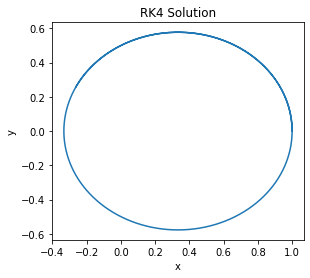

In [25]:
fig = plt.figure()
plt.title('RK4 Solution')
plt.xlabel('x')
plt.ylabel('y')
ax = fig.add_subplot(111)
plt.plot( o[:,1], o[:,2])
ax.set_aspect('equal')
plt.show()